## 高度な例

ノイズ除去：ROFモデル



ROF解法
$$J(I)=\int|\nabla I| dx $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline


def denoise(im, U_int, tolerance=0.1, tau=0.125, tv_weight=100):
    """
    Rudin-Osher-Fatemi(ROF) #のいず除去モデル
    入力：ノイズのある入力画像(グレイスケール)、Uの初期ガウス分布、終了判定時の許容誤差、ステップ調、TV正規化の重み
    出力；ノイズを除去された画像、残余テクスチャ
    """

    m, n = im.shape
    #初期化
    U = U_int
    Px = im
    Py = im
    error = 1

    while(error>tolerance):
        Uold = U

        # 手変数の勾配
        GradUx = np.roll(U, -1, axis = 1)-U #Uの勾配のx成分
        GradUy = np.roll(U, -1, axis = 0)-U #Uの勾配のx成分

        # 双対変数を更新
        PxNew = Px + (tau/tv_weight)*GradUx # non-normalized update of x-component (dual)
        PyNew = Py + (tau/tv_weight)*GradUy # non-normalized update of y-component (dual)
        NormNew = np.maximum(1,np.sqrt(PxNew**2+PyNew**2))

        #双対変数を更新
        Px = PxNew/NormNew # update of x-component (dual)
        Py = PyNew/NormNew # update of y-component (dual)

        # 双対領域の発散
        RxPx = np.roll(Px,1,axis=1) # right x-translation of x-component
        RyPy = np.roll(Py,1,axis=0) # right y-translation of y-component

        # 主変数を更新
        DivP = (Px-RxPx)+(Py-RyPy) # divergence of the dual field.
        U = im + tv_weight*DivP # update of the primal variable

        # update of error
        error = np.linalg.norm(U-Uold)/np.sqrt(n*m)

    return U,im-U # denoised image and texture residual

/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_83267/277989375.py:14: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  G = filters.gaussian_filter(im,10)


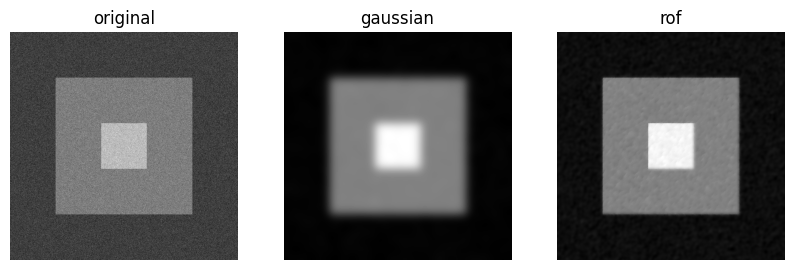

In [7]:
from numpy import random
from scipy.ndimage import filters
# from scipy.misc import imsave

# ノイズを含む画像を合成し、ROFノイズを行う

# ノイズを含む画像を合成する
im = np.zeros((500,500))
im[100:400,100:400] = 128
im[200:300,200:300] = 255
im = im + 30*random.standard_normal((500,500))

U,T = denoise(im,im)
G = filters.gaussian_filter(im,10)


# 画像を表示する
imlist = [im, G, U]
tlist = ['original', 'gaussian', 'rof']
plt.figure(figsize=(10,10))
plt.gray()
for i, im, title in zip(range(3),imlist, tlist):
    plt.subplot(1,3,i+1)
    plt.imshow(im)
    plt.axis('off')
#     plt.axis('equal')
    plt.title(title)


/var/folders/cj/l36tlms15_z4jzdj2fzxk3vm0000gn/T/ipykernel_83267/3323981743.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  G = filters.gaussian_filter(im, 10)


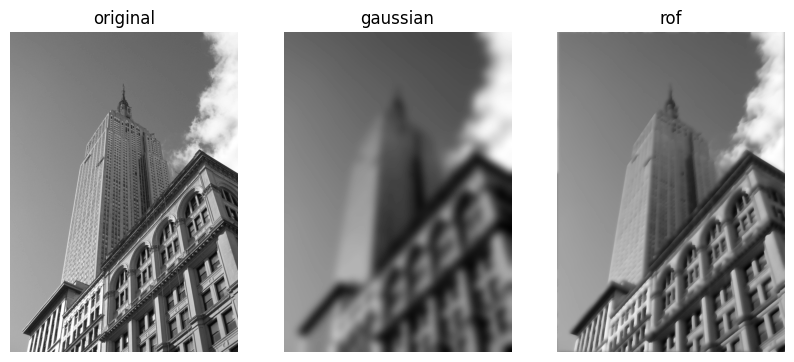

In [9]:
# オリジナル画像
im = np.array(Image.open('../data/empire.jpg').convert('L'))
# gaussian fileter sigma = 10
G = filters.gaussian_filter(im, 10)
# ROFノイズ除去フィルタ
U, T = denoise(im, im)

# 画像を表示する
imlist = [im, G, U]
tlist = ['original', 'gaussian', 'rof']
plt.figure(figsize=(10,10))
plt.gray()
for i, im, title in zip(range(3),imlist, tlist):
    plt.subplot(1,3,i+1)
    plt.imshow(im)
    plt.axis('off')
    plt.title(title)